In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
data_BX = pd.read_csv("/content/drive/MyDrive/NYC Building Data/BX.csv")

In [5]:
data_BX.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [6]:
data_BX = data_BX[['ZipCode','Address','BldgClass','LandUse',
                   'OwnerType','OwnerName','LotArea','BldgArea',
                   'ComArea','ResArea','OfficeArea', 'RetailArea', 'GarageArea', 
                   'StrgeArea','FactryArea', 'OtherArea','NumFloors', 'UnitsRes','UnitsTotal','YearBuilt',
                   'YearAlter1', 'YearAlter2','BuiltFAR','CommFAR','XCoord', 'YCoord']]
data_BX.head(5)

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord
0,10454.0,122 BRUCKNER BOULEVARD,Z9,NaN,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,5.0,1005957.0,232162.0
1,10454.0,126 BRUCKNER BOULEVARD,G5,7.0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,1.0,0,1,1931,1994,0,0.05,5.0,1006076.0,232156.0
2,10454.0,138 BRUCKNER BOULEVARD,F9,6.0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2.0,0,1,1931,0,0,1.13,5.0,1006187.0,232036.0
3,10454.0,144 BRUCKNER BOULEVARD,E9,6.0,NaN,144 BRUCKNER LLC,2500,10625,10625,0,0,2125,0,0,8500,0,5.0,0,1,1931,2001,0,4.25,5.0,1006299.0,232033.0
4,10454.0,148 BRUCKNER BOULEVARD,C7,4.0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,5.0,8,10,1920,2009,0,4.58,5.0,1006363.0,232040.0


In [7]:
# Check percentage of null data
(data_BX.isnull().sum()/len(data_BX)*100)

ZipCode        0.407436
Address        0.094623
BldgClass      0.092397
LandUse        0.495380
OwnerType     81.693198
OwnerName      0.739174
LotArea        0.000000
BldgArea       0.000000
ComArea        0.000000
ResArea        0.000000
OfficeArea     0.000000
RetailArea     0.000000
GarageArea     0.000000
StrgeArea      0.000000
FactryArea     0.000000
OtherArea      0.000000
NumFloors      0.000000
UnitsRes       0.000000
UnitsTotal     0.000000
YearBuilt      0.000000
YearAlter1     0.000000
YearAlter2     0.000000
BuiltFAR       0.000000
CommFAR        0.000000
XCoord         3.709229
YCoord         3.709229
dtype: float64

In [8]:
data_BX["OwnerType"].unique()

array([nan, 'P', 'C', 'X', 'O', 'M'], dtype=object)

    - C City Ownership
    - M Mixed City & Private Ownership
    - O Other – Public Authority, State or Federal Ownership
    - P Private Ownership – Either the tax lot has started an “in rem action or it was once city owned.
    - X Mixed (Excludes property with a C, M, O, or P ownership code). 
    Fully tax exempt property that could be owned by the city, state, or federal government; a public authority; or a private institution
    - blank Unknown (Usually Private Ownership)

In [9]:
# Rename NULL in OwnerType as UNK indicates an unknown ownership, we don't drop NULL here because it is not a mistake
data_BX["OwnerType"] = data_BX["OwnerType"].fillna("UNK").astype('category')
data_BX["OwnerType"] = data_BX["OwnerType"].cat.reorder_categories(['P', 'C', 'X', 'O', 'M', 'UNK'])

In [10]:
# Because the other NULL value is only ~1%, we decide to drop it for now
data_BX.dropna(inplace=True)

In [11]:
# Drop value(s) with coordinates 0
data_BX = data_BX[data_BX['XCoord'] != 0]

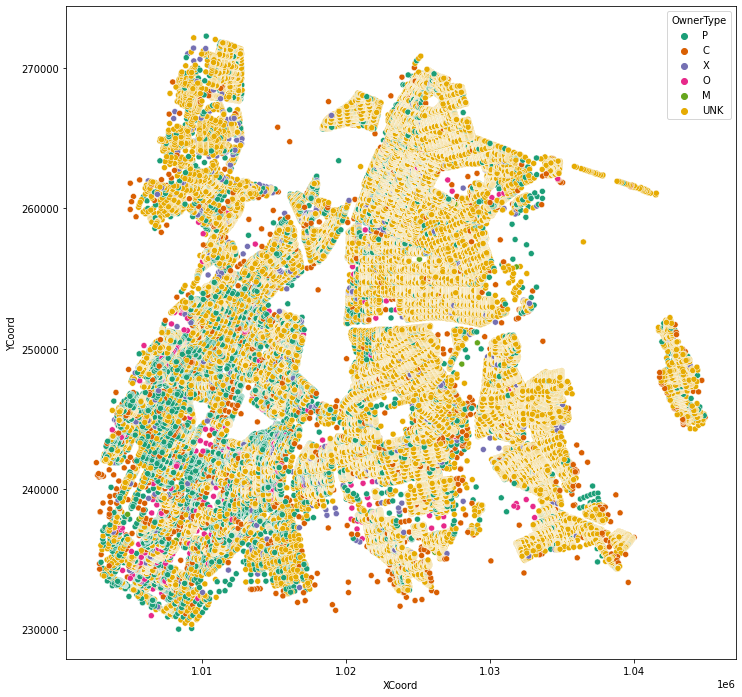

In [12]:
# Distribution of property by OwnerType
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BX, hue='OwnerType', palette='Dark2');

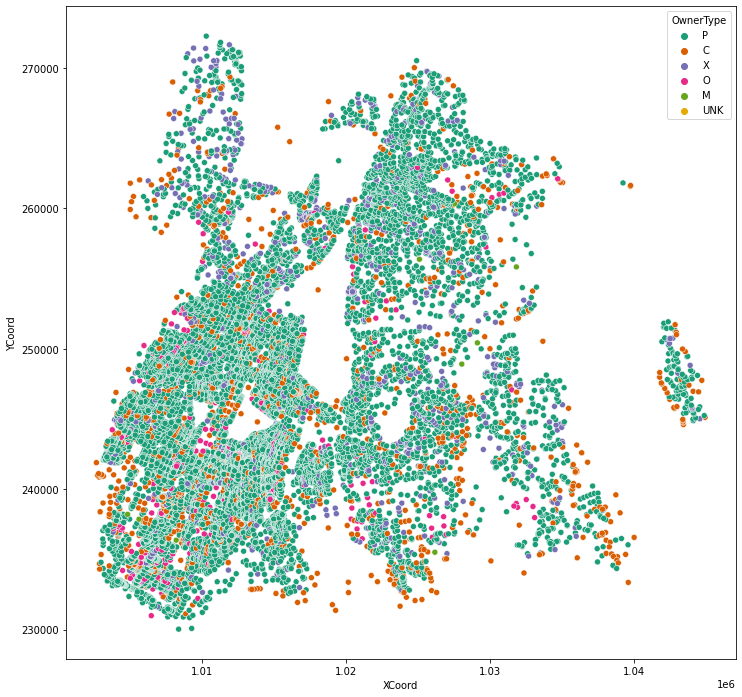

In [13]:
# Distribution of property by OwnerType (UNK excluded)
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BX[data_BX['OwnerType'] != 'UNK'], hue='OwnerType', palette='Dark2');

    - 01 One &Two Family Buildings
    - 02 Multi-Family Walk-Up Buildings
    - 03 Multi-Family Elevator Buildings
    - 04 Mixed Residential & Commercial Buildings
    - 05 Commercial & Office Buildings
    - 06 Industrial & Manufacturing
    - 07 Transportation & Utility
    - 08 Public Facilities & Institutions
    - 09 Open Space & Outdoor Recreation
    - 10 Parking Facilities
    - 11 Vacant Land

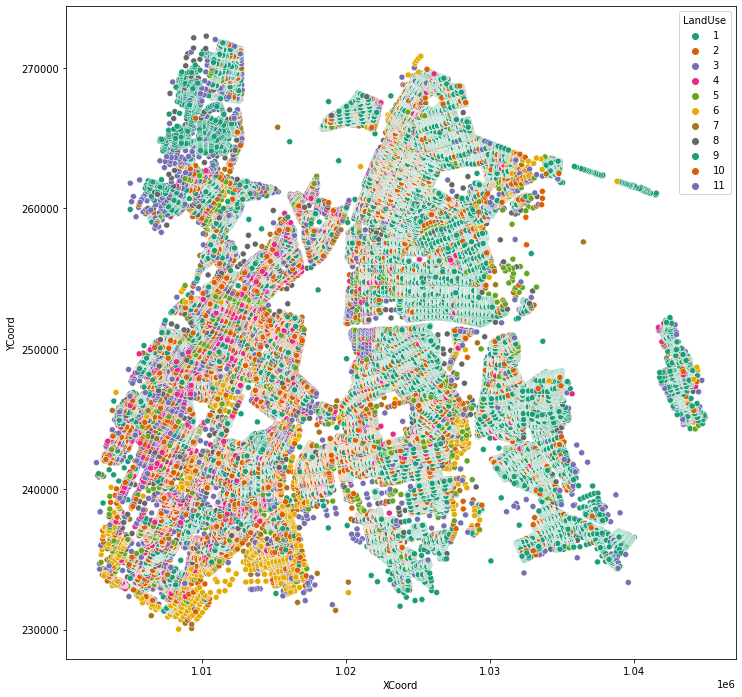

In [14]:
# Distribution of property by LandUse
plt.figure(figsize=(12,12))
data_BX['LandUse'] = data_BX['LandUse'].astype('int').astype('category')
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BX, hue='LandUse', palette='Dark2');

**Investigate YearBuilt**

In [15]:
# Check how many building with unknown YearBuilt
sum(data_BX['YearBuilt'] == 0)/len(data_BX['YearBuilt'])*100

3.822592501837785

In [16]:
# Because it is only about 3%, I think we can remove that observation for now
data_BX_nonZero = data_BX[data_BX['YearBuilt'] != 0]
# Create Age variable by substracting current year with YearBuilt
data_BX_nonZero['Age'] = 2021 - data_BX_nonZero['YearBuilt']

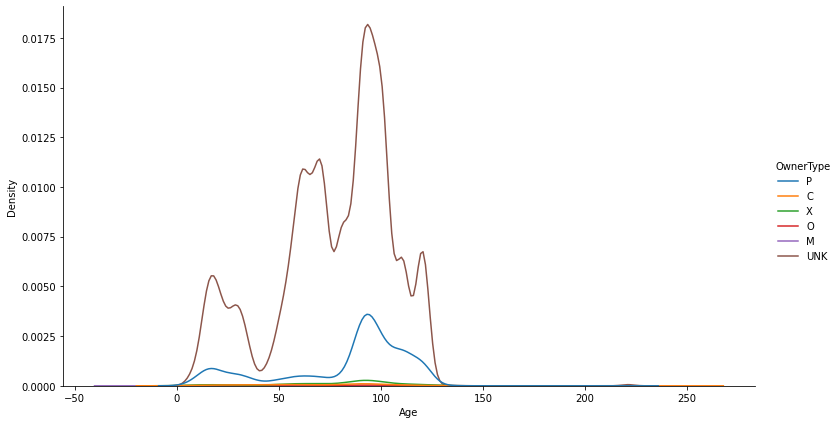

In [17]:
sns.displot(data=data_BX_nonZero, x='Age', hue='OwnerType', kind='kde', height=6, aspect=1.8);

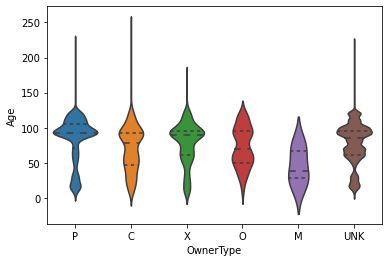

In [18]:
sns.violinplot(x='OwnerType', y='Age', data=data_BX_nonZero, inner="quartile")

In [19]:
data_BX_nonZero.head()

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord,Age
1,10454.0,126 BRUCKNER BOULEVARD,G5,7,UNK,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,1.0,0,1,1931,1994,0,0.05,5.0,1006076.0,232156.0,90
2,10454.0,138 BRUCKNER BOULEVARD,F9,6,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2.0,0,1,1931,0,0,1.13,5.0,1006187.0,232036.0,90
3,10454.0,144 BRUCKNER BOULEVARD,E9,6,UNK,144 BRUCKNER LLC,2500,10625,10625,0,0,2125,0,0,8500,0,5.0,0,1,1931,2001,0,4.25,5.0,1006299.0,232033.0,90
4,10454.0,148 BRUCKNER BOULEVARD,C7,4,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,5.0,8,10,1920,2009,0,4.58,5.0,1006363.0,232040.0,101
6,10454.0,519 EAST 132 STREET,E9,6,UNK,122 BRUCKNER PARTNERS,8700,5316,5316,0,0,0,0,5316,0,0,1.0,0,2,1931,0,0,0.61,5.0,1006046.0,232055.0,90


**How many building was altered since it was built?**

In [20]:
# Only use the latest YearAlter
# Note: This code a bit inefficient, should be another way that could process faster
tmp = []
for i in range(0,len(data_BX_nonZero)):
  YearAlter1 = data_BX_nonZero.iloc[i]['YearAlter1']
  YearAlter2 = data_BX_nonZero.iloc[i]['YearAlter2']
  if YearAlter2 == 0:
    tmp.append(YearAlter1)
  else:
    tmp.append(YearAlter2)

In [21]:
data_BX_nonZero['YearAlter'] = tmp

In [22]:
# Only 8.96% is altered since it was built!
sum(data_BX_nonZero['YearAlter'] != 0)/len(data_BX_nonZero['YearAlter'])*100

8.964513193812557

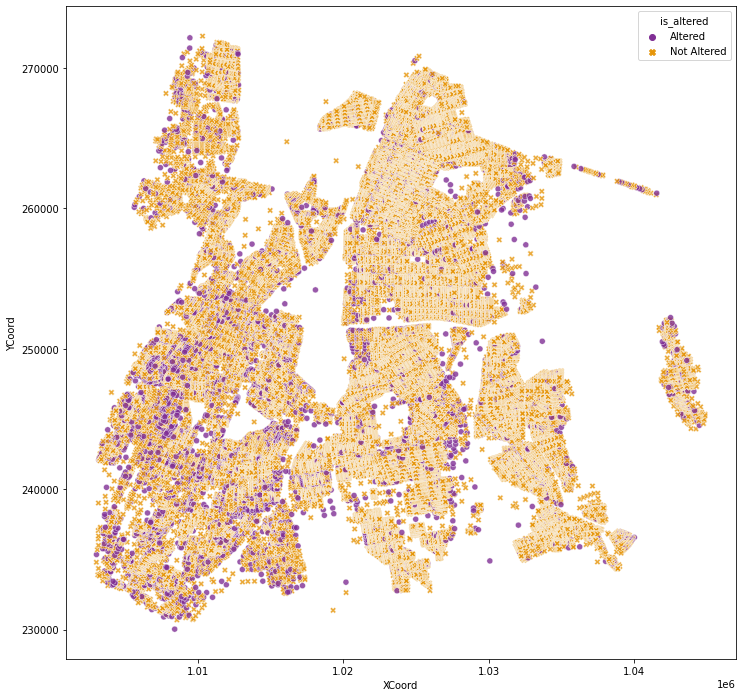

In [23]:
# Distribution of property that already altered
plt.figure(figsize=(12,12))
data_BX_nonZero['is_altered'] = np.where(data_BX_nonZero['YearAlter']== 0, "Not Altered", "Altered")
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BX_nonZero, hue='is_altered', style='is_altered', palette='CMRmap',alpha=0.8);

In [24]:
data_BX_nonZero['ZipCode'] = data_BX_nonZero['ZipCode'].astype('int').astype('category')
pd.pivot_table(data_BX_nonZero, values=['Age'], 
                     index=['ZipCode'], aggfunc=[np.mean, np.median, np.std]).transpose()

,ZipCode,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10475,10803
mean,Age,78.042312,84.197194,83.277836,78.349797,73.965736,80.607968,81.474869,93.873195,66.033935,79.101953,82.701902,84.899295,81.201581,84.963836,71.879561,76.978830,83.669520,96.007304,70.841187,85.631793,79.969331,83.573066,65.815647,80.688542,54.961477,69.380952
median,Age,90.000000,95.000000,97.000000,90.000000,90.000000,94.000000,94.000000,101.000000,48.500000,94.000000,90.000000,91.000000,86.000000,91.000000,71.000000,81.000000,93.000000,101.000000,71.000000,96.000000,86.000000,91.000000,66.000000,91.000000,56.000000,62.000000
std,Age,36.186804,33.377516,34.529195,37.960017,40.674208,38.333864,38.213672,28.329732,41.050004,38.830240,22.734938,26.662811,27.599134,25.516788,23.048346,25.629704,27.780387,25.188972,22.323010,25.379027,24.861438,22.083091,29.473854,30.757891,29.664931,23.943992


**Now we will investigate distribution of LandUse and OwnerType with other variables**

In [25]:
pd.pivot_table(data_BX, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['LandUse'], aggfunc=[np.mean, np.median])

mean                              ...   median                     
             BldgArea       ComArea    FactryArea  ...  ResArea RetailArea StrgeArea
LandUse                                            ...                              
1         2009.583753      0.150987      0.000000  ...   1902.0          0         0
2         7058.725423     11.821778      0.000000  ...   3315.0          0         0
3        99612.864762   1615.451429     11.560000  ...  57659.5          0         0
4        23901.843449   3185.081792     13.931493  ...   3500.0       1200         0
5        12149.608931  11798.844723     52.828146  ...      0.0       3500         0
6        21451.339884  21430.720524  10266.860262  ...      0.0          0         0
7        10390.737160  10364.972810      9.969789  ...      0.0          0         0
8        43523.768124  42924.274520    135.394456  ...      0.0          0         0
9         8674.977876   8115.179204     60.619469  ...      0.0          0         0
10        6102.679255   5965.109367    146.244237  ...      0.0          0         0
11           0.000000      0.000000      0.000000  ...      0.0          0         0

[11 rows x 20 columns]

In [26]:
pd.pivot_table(data_BX, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType'], aggfunc=[np.mean, np.median])

mean                 ...     median          
                BldgArea        ComArea  ... RetailArea StrgeArea
OwnerType                                ...                     
P           19209.911480    4913.542125  ...          0         0
C           39278.343261   36187.937453  ...          0         0
X           26234.740053   14458.263484  ...          0         0
O          156644.725240   16791.220447  ...          0         0
M          291097.909091  187669.000000  ...          0         0
UNK          4598.918303     676.343598  ...          0         0

[6 rows x 20 columns]

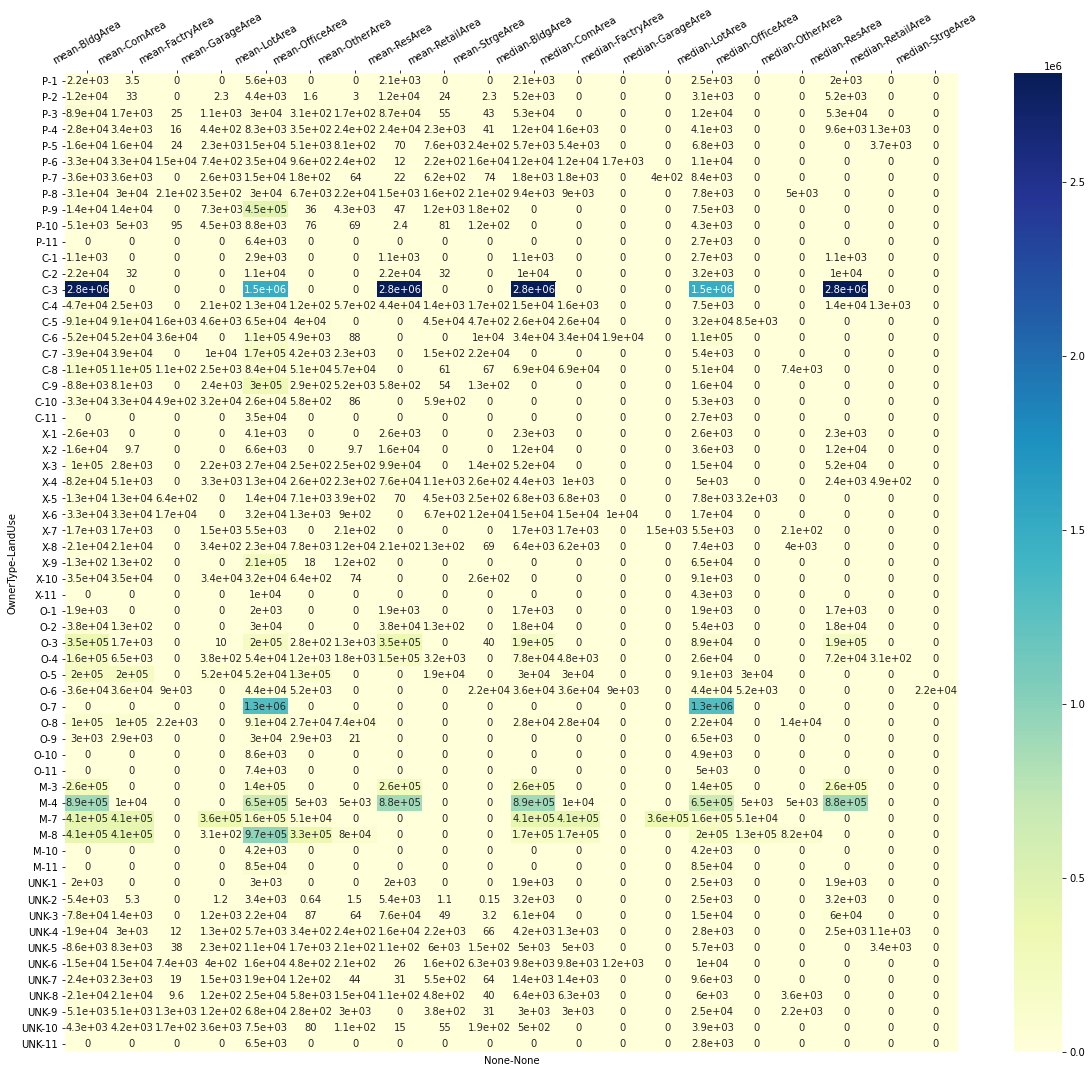

In [27]:
tab = pd.pivot_table(data_BX, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType','LandUse'], aggfunc=[np.mean, np.median])
plt.figure(figsize=(20,18))
ax = sns.heatmap(tab, annot=True, cmap="YlGnBu");
ax.xaxis.tick_top()
plt.xticks(rotation=30);

**Save Cleaned Version**

  - Renamed NAN in OwnerType as UNK
  - Drop NULL values for the rest of variables (only ~1%)

In [28]:
data_BX.to_csv("data_BX_cleaned.csv", index=False)